<a href="https://colab.research.google.com/github/Chania12/LDA-Airbnb-Review-for-Urban-Livability/blob/main/Airbnb_Review_and_Urban_Livability_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Latent Dirichlet Analysis**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import names
from nltk.corpus import wordnet as wn
import gensim
from gensim import corpora
from gensim.models import LdaModel


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

listing=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/listings.csv")
review=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews.csv")
review['comments']=review['comments'].astype(str)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


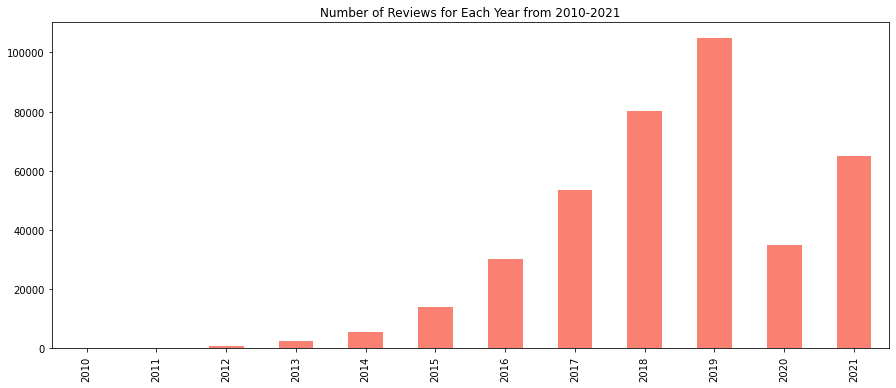

In [ ]:
review.date.astype(str).str[0:4].value_counts().sort_index().plot(kind='bar', figsize=(15,6), title= 'Number of Reviews for Each Year from 2010-2021', color='salmon')


In [ ]:
review.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...


In [ ]:
review.shape

(392478, 6)

In [ ]:
original_review=review['comments'].reset_index(drop=True)
original_review.head

<bound method NDFrame.head of 0         My wife and I stayed at this beautiful apartme...
1         Charlotte couldn't have been a more thoughtful...
2         I went to Edinburgh for the second time on Apr...
3         This flat was incredible. As other guests have...
4         Fantastic host and the apartment was perfect. ...
                                ...                        
392473    A very warm and friendly welcome, Graeme was g...
392474    The apartment is fantastic.  clean.  and the b...
392475    We were very happy to be Ross and Claire’s fir...
392476    We had a great time seeing Edinburgh while sta...
392477    Super affordable, stylish, cosy, comfortable s...
Name: comments, Length: 392478, dtype: object>

**Data Pre-Processing**
1. Stemming : Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 
2. Lemmatization : Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . 
3. Normalization (lowercase)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('names')
import spacy
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [ ]:
# tokenizer
tokenizer= RegexpTokenizer(r'\w+')

# Stop words
stop_words=stopwords.words('english')

# Puctuation 
exclude= set(string.punctuation)

# Lemmatization 
lemma=WordNetLemmatizer()


def clean(doc):
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude) 

    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_review = [clean(doc).split() for doc in original_review]  


In [ ]:
clean_review

[['wife',
  'stayed',
  'beautiful',
  'apartment',
  'stay',
  'spectacular',
  'neighborhood',
  'cute',
  'stayed',
  'full',
  'week',
  'enjoyed',
  'going',
  'local',
  'cafe',
  'restaurant',
  'really',
  'enjoyed',
  'within',
  'easy',
  'walking',
  'distance',
  'major',
  'tourist',
  'site',
  'surrounded',
  'tourist',
  'trap',
  'recommended',
  'apartment',
  'wife',
  'parent',
  'thinking',
  'visiting',
  'edinburgh',
  'future',
  'charlotte',
  'extremely',
  'helpful',
  'getting',
  'u',
  'information',
  'next',
  'leg',
  'trip',
  'visiting',
  'isle',
  'mull',
  'making',
  'u',
  'feel',
  'welcomed',
  'wife',
  'visited',
  'four',
  'airbnb',
  'apartment',
  'far',
  'one',
  'best'],
 ['charlotte',
  'thoughtful',
  'accomodating',
  'host',
  'brthe',
  'flat',
  'literally',
  'everything',
  'could',
  'possibly',
  'need',
  'information',
  'recommendation',
  'surrounding',
  'area',
  'nail',
  'polish',
  'remover',
  'shoe',
  'polish',
  